# Clothing fit dataset

## Чтение данных

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
data = pd.read_json('renttherunway_final_data.json', lines=True)

In [4]:
print('Data RentTheRunWay shape: ', data.shape)

Data RentTheRunWay shape:  (192544, 15)


In [5]:
data = data[['user_id', 'age', 'body type', 'weight', 'bust size', 'height', 'item_id', 'size', 
                       'category', 'rating', 'rented for', 'review_date', 'review_summary', 'review_text', 'fit']]
data.columns = ['user_id', 'age', 'body_type', 'weight', 'bust_size', 'height', 'item_id', 'size', 
                'category', 'rating', 'rented_for', 'review_date', 'review_summary', 'review_text', 'fit']

In [6]:
data.head()

,user_id,age,body_type,weight,bust_size,height,item_id,size,category,rating,rented_for,review_date,review_summary,review_text,fit
0,420272,28.0,hourglass,137lbs,34d,"5' 8""",2260466,14,romper,10.0,vacation,"April 20, 2016",So many compliments!,An adorable romper! Belt and zipper were a lit...,fit
1,273551,36.0,straight & narrow,132lbs,34b,"5' 6""",153475,12,gown,10.0,other,"June 18, 2013",I felt so glamourous!!!,I rented this dress for a photo shoot. The the...,fit
2,360448,116.0,NaN,NaN,NaN,"5' 4""",1063761,4,sheath,10.0,party,"December 14, 2015",It was a great time to celebrate the (almost) ...,This hugged in all the right places! It was a ...,fit
3,909926,34.0,pear,135lbs,34c,"5' 5""",126335,8,dress,8.0,formal affair,"February 12, 2014",Dress arrived on time and in perfect condition.,I rented this for my company's black tie award...,fit
4,151944,27.0,athletic,145lbs,34b,"5' 9""",616682,12,gown,10.0,wedding,"September 26, 2016",Was in love with this dress !!!,I have always been petite in my upper body and...,fit


* __user_id__ - a unique id fot the customer
* __age__ - age of the customer
* __body type__ - body type of customer
* __weight__ - weight measurement of customer
* __bust size__ - bust measurement of customer
* __height__ - height of the customer
* __item_id__ - unique product id
* __size__ - the standartized size of the product
* __category__ - the category of product
* __rating__ - rating for the product
* __rented for__ - purpose clothing was rented for
* __review_date__ - date when the review was written
* __review_summary__ - summary of the review
* __review_text__ - review given by the customer
* __fit__ - fit feedback
                      

## Обработка имеющихся данных

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 15 columns):
user_id           192544 non-null int64
age               191584 non-null float64
body_type         177907 non-null object
weight            162562 non-null object
bust_size         174133 non-null object
height            191867 non-null object
item_id           192544 non-null int64
size              192544 non-null int64
category          192544 non-null object
rating            192462 non-null float64
rented_for        192534 non-null object
review_date       192544 non-null object
review_summary    192544 non-null object
review_text       192544 non-null object
fit               192544 non-null object
dtypes: float64(2), int64(3), object(10)
memory usage: 22.0+ MB



> Для начала переведем столбцы `weight` и `height` в привычную систему мер и весов


In [8]:
def lbs_to_kgs(x):
    if type(x) == type(1.0):
        return
    try:
        return (int(x[:-3]) * 0.454)
    except:
        return x
    
data.weight = data.weight.apply(lbs_to_kgs)

In [9]:
def fts_to_cms(x):
    if type(x) == type(1.0):
        return
    try:
        return (int(x[0]) * 30.48 + int(x[3:-1]) * 2.54)
    except:
        return (int(x[0]) * 30.48)
    
data.height = data.height.apply(fts_to_cms)

In [10]:
data.head()

,user_id,age,body_type,weight,bust_size,height,item_id,size,category,rating,rented_for,review_date,review_summary,review_text,fit
0,420272,28.0,hourglass,62.198,34d,172.72,2260466,14,romper,10.0,vacation,"April 20, 2016",So many compliments!,An adorable romper! Belt and zipper were a lit...,fit
1,273551,36.0,straight & narrow,59.928,34b,167.64,153475,12,gown,10.0,other,"June 18, 2013",I felt so glamourous!!!,I rented this dress for a photo shoot. The the...,fit
2,360448,116.0,NaN,NaN,NaN,162.56,1063761,4,sheath,10.0,party,"December 14, 2015",It was a great time to celebrate the (almost) ...,This hugged in all the right places! It was a ...,fit
3,909926,34.0,pear,61.290,34c,165.10,126335,8,dress,8.0,formal affair,"February 12, 2014",Dress arrived on time and in perfect condition.,I rented this for my company's black tie award...,fit
4,151944,27.0,athletic,65.830,34b,175.26,616682,12,gown,10.0,wedding,"September 26, 2016",Was in love with this dress !!!,I have always been petite in my upper body and...,fit


In [11]:
data.describe()

,user_id,age,weight,height,item_id,size,rating
count,192544.000000,191584.000000,162562.000000,191867.000000,1.925440e+05,192544.000000,192462.000000
mean,499494.100149,33.871017,62.375836,165.888978,1.045684e+06,12.245175,9.092371
std,289059.719328,8.058083,9.942585,6.765239,8.053148e+05,8.494877,1.430044
min,9.000000,0.000000,22.700000,137.160000,1.233730e+05,0.000000,2.000000
25%,250654.250000,29.000000,55.842000,160.020000,1.950760e+05,8.000000,8.000000
50%,499419.000000,32.000000,61.290000,165.100000,9.483960e+05,12.000000,10.000000
75%,750974.000000,37.000000,67.192000,170.180000,1.678888e+06,16.000000,10.000000
max,999997.000000,117.000000,136.200000,198.120000,2.966087e+06,58.000000,10.000000


In [12]:
data.describe(include = [object])

,body_type,bust_size,category,rented_for,review_date,review_summary,review_text,fit
count,177907,174133,192544,192534,192544,192544,192544,192544
unique,7,106,68,9,2274,154740,191031,3
top,hourglass,34b,dress,wedding,"June 15, 2016",Stylist Review,.,fit
freq,55349,27285,92884,57784,844,977,63,142058


> Столбец `bust_size` содержит много уникальных значений

In [13]:
data['bust_size'].unique()

array(['34d', '34b', nan, '34c', '32b', '34d+', '36d', '36a', '32d+',
       '36c', '32c', '32dd', '30dd', '32d', '36b', '34a', '34dd',
       '40ddd/e', '32a', '38d+', '38c', '34ddd/e', '38a', '38b', '38d',
       '36ddd/e', '38dd', '38f', '42dd', '36dd', '40g', '40dd', '28f',
       '30ddd/e', '32ddd/e', '28b', '36d+', '40d', '28dd', '34f', '42c',
       '30d', '30b', '42d', '34aa', '32aa', '36f', '28c', '40b', '36aa',
       '34g', '32f', '42ddd/e', '40c', '28g', '28aa', '36g', '30a',
       '44ddd/e', '30c', '30aa', '44dd', '32i', '32g', '30g', '38h',
       '30h', '34j', '38ddd/e', '32h', '28a', '44d', '40h', '38g', '34h',
       '36j', '40f', '36h', '28ddd/e', '44f', '34i', '30f', '36i', '30i',
       '28h', '42b', '42j', '32j', '46c', '48d', '38aa', '38i', '48dd',
       '28d', '28i', '46ddd/e', '42g', '44c', '42f', '40j', '38j', '46f',
       '44b', '44g', '42h', '40i', '44h'], dtype=object)

> Данные можно разделить на два столбца: `bra_size` (число) и `cup_size` (буквы)

In [14]:
data['bra_size'] = pd.to_numeric(data['bust_size'].str[:2])
data['cup_size'] = data['bust_size'].str[2:]
data = data.drop('bust_size', axis=1)
data = data[['user_id', 'age', 'body_type', 'weight', 'bra_size', 'cup_size', 'height', 'item_id', 'size', 
             'category', 'rating', 'rented_for', 'review_date', 'review_summary', 'review_text', 'fit']]

In [15]:
data.head()

,user_id,age,body_type,weight,bra_size,cup_size,height,item_id,size,category,rating,rented_for,review_date,review_summary,review_text,fit
0,420272,28.0,hourglass,62.198,34.0,d,172.72,2260466,14,romper,10.0,vacation,"April 20, 2016",So many compliments!,An adorable romper! Belt and zipper were a lit...,fit
1,273551,36.0,straight & narrow,59.928,34.0,b,167.64,153475,12,gown,10.0,other,"June 18, 2013",I felt so glamourous!!!,I rented this dress for a photo shoot. The the...,fit
2,360448,116.0,NaN,NaN,NaN,NaN,162.56,1063761,4,sheath,10.0,party,"December 14, 2015",It was a great time to celebrate the (almost) ...,This hugged in all the right places! It was a ...,fit
3,909926,34.0,pear,61.290,34.0,c,165.10,126335,8,dress,8.0,formal affair,"February 12, 2014",Dress arrived on time and in perfect condition.,I rented this for my company's black tie award...,fit
4,151944,27.0,athletic,65.830,34.0,b,175.26,616682,12,gown,10.0,wedding,"September 26, 2016",Was in love with this dress !!!,I have always been petite in my upper body and...,fit


In [16]:
data.describe(include = [object])

,body_type,cup_size,category,rented_for,review_date,review_summary,review_text,fit
count,177907,174133,192544,192534,192544,192544,192544,192544
unique,7,13,68,9,2274,154740,191031,3
top,hourglass,c,dress,wedding,"June 15, 2016",Stylist Review,.,fit
freq,55349,49634,92884,57784,844,977,63,142058


In [17]:
data['category'].unique()

array(['romper', 'gown', 'sheath', 'dress', 'leggings', 'top', 'jumpsuit',
       'sweater', 'jacket', 'shirtdress', 'maxi', 'shift', 'pants',
       'shirt', 'mini', 'skirt', 'pullover', 'blouse', 'suit', 'coat',
       'trench', 'bomber', 'cape', 'blazer', 'vest', 'duster', 'ballgown',
       'tank', 'poncho', 'frock', 'tunic', 'cardigan', 'culottes', 'down',
       'trouser', 'midi', 'pant', 'legging', 'print', 'knit', 'culotte',
       'sweatshirt', 'peacoat', 'kaftan', 'overalls', 'jogger', 'tee',
       'combo', 'henley', 'cami', 'blouson', 'turtleneck', 'trousers',
       'overcoat', 'hoodie', 't-shirt', 'caftan', 'tight', 'kimono',
       'for', 'crewneck', 'skirts', 'parka', 'buttondown', 'skort',
       'sweatershirt', 'sweatpants', 'jeans'], dtype=object)

> Столбец `category` тоже содержит много уникальных значений, но единственное, что можно сделать - удалить его

In [18]:
data.corr()

,user_id,age,weight,bra_size,height,item_id,size,rating
user_id,1.000000,0.007424,0.000473,0.005144,-0.009237,-0.002721,0.003442,-0.006973
age,0.007424,1.000000,0.066194,0.171436,-0.007465,0.026516,0.155687,-0.035280
weight,0.000473,0.066194,1.000000,0.642023,0.383784,-0.035320,0.850962,-0.022494
bra_size,0.005144,0.171436,0.642023,1.000000,0.156607,-0.051760,0.660161,-0.019586
height,-0.009237,-0.007465,0.383784,0.156607,1.000000,0.004690,0.228875,0.001746
item_id,-0.002721,0.026516,-0.035320,-0.051760,0.004690,1.000000,-0.044311,-0.001163
size,0.003442,0.155687,0.850962,0.660161,0.228875,-0.044311,1.000000,-0.036731
rating,-0.006973,-0.035280,-0.022494,-0.019586,0.001746,-0.001163,-0.036731,1.000000


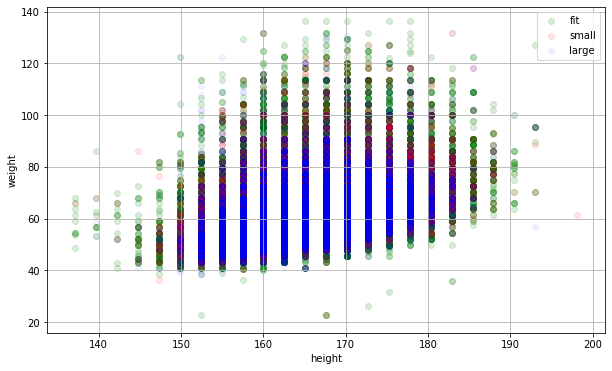

In [19]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['fit'] == 'fit']['height'],
            data[data['fit'] == 'fit']['weight'],
            alpha = 0.15,
            label = 'fit',
            color = 'g')

plt.scatter(data[data['fit'] == 'small']['height'],
            data[data['fit'] == 'small']['weight'],
            alpha = 0.1,
            label = 'small',
            color = 'r')

plt.scatter(data[data['fit'] == 'large']['height'],
            data[data['fit'] == 'large']['weight'],
            alpha = 0.05,
            label = 'large',
            color = 'b')

plt.xlabel('height')
plt.ylabel('weight')
plt.legend()
plt.grid()

## Обработка пропущенных значений

In [20]:
missing = pd.DataFrame({'missing': data.isnull().sum(), 'percentage(%)': round((data.isnull().sum()/192544)*100, 2)})
missing

,missing,percentage(%)
user_id,0,0.00
age,960,0.50
body_type,14637,7.60
weight,29982,15.57
bra_size,18411,9.56
cup_size,18411,9.56
height,677,0.35
item_id,0,0.00
size,0,0.00
category,0,0.00


> Заполним пропущенные значения медианным или самым популярным значением в столбце

In [21]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['body_type', 'cup_size', 'category', 'rented_for', 'review_date', 'review_summary', 'review_text', 'fit']
['user_id', 'age', 'weight', 'bra_size', 'height', 'item_id', 'size', 'rating']


In [22]:
data.median(axis = 0)

user_id     499419.00
age             32.00
weight          61.29
bra_size        34.00
height         165.10
item_id     948396.00
size            12.00
rating          10.00
dtype: float64

In [23]:
data = data.fillna(data.median(axis = 0), axis = 0)

In [24]:
data_describe = data.describe(include = [object])
data_describe

,body_type,cup_size,category,rented_for,review_date,review_summary,review_text,fit
count,177907,174133,192544,192534,192544,192544,192544,192544
unique,7,13,68,9,2274,154740,191031,3
top,hourglass,c,dress,wedding,"June 15, 2016",Stylist Review,.,fit
freq,55349,49634,92884,57784,844,977,63,142058


In [25]:
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

In [26]:
missing = pd.DataFrame({'missing': data.isnull().sum(), 'percentage(%)': round((data.isnull().sum()/192544)*100, 2)})
missing

,missing,percentage(%)
user_id,0,0.0
age,0,0.0
body_type,0,0.0
weight,0,0.0
bra_size,0,0.0
cup_size,0,0.0
height,0,0.0
item_id,0,0.0
size,0,0.0
category,0,0.0


## Анализ задачи

> Столбцы `user_id` и `item_id` не являются значимыми для подбора подходящей одежды. 

In [27]:
data = data.drop(['user_id', 'item_id', 'review_date', 'review_summary', 'review_text'], axis=1)

In [28]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['body_type', 'cup_size', 'category', 'rented_for', 'fit']
['age', 'weight', 'bra_size', 'height', 'size', 'rating']


## Векторизация данных

In [29]:
categorical_columns.remove('fit')
print(categorical_columns)

['body_type', 'cup_size', 'category', 'rented_for']


In [30]:
data_categorical = pd.get_dummies(data[categorical_columns])
print(data_categorical.columns)

Index(['body_type_apple', 'body_type_athletic', 'body_type_full bust',
       'body_type_hourglass', 'body_type_pear', 'body_type_petite',
       'body_type_straight & narrow', 'cup_size_a', 'cup_size_aa',
       'cup_size_b', 'cup_size_c', 'cup_size_d', 'cup_size_d+', 'cup_size_dd',
       'cup_size_ddd/e', 'cup_size_f', 'cup_size_g', 'cup_size_h',
       'cup_size_i', 'cup_size_j', 'category_ballgown', 'category_blazer',
       'category_blouse', 'category_blouson', 'category_bomber',
       'category_buttondown', 'category_caftan', 'category_cami',
       'category_cape', 'category_cardigan', 'category_coat', 'category_combo',
       'category_crewneck', 'category_culotte', 'category_culottes',
       'category_down', 'category_dress', 'category_duster', 'category_for',
       'category_frock', 'category_gown', 'category_henley', 'category_hoodie',
       'category_jacket', 'category_jeans', 'category_jogger',
       'category_jumpsuit', 'category_kaftan', 'category_kimono',
       

## Нормализация данных

In [31]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,age,weight,bra_size,height,size,rating
count,192544.000000,192544.000000,192544.000000,192544.000000,192544.000000,192544.000000
mean,33.861689,62.206755,34.182026,165.886204,12.245175,9.092758
std,8.039050,9.144217,1.660765,6.753497,8.494877,1.429862
min,0.000000,22.700000,28.000000,137.160000,0.000000,2.000000
25%,29.000000,56.750000,34.000000,160.020000,8.000000,8.000000
50%,32.000000,61.290000,34.000000,165.100000,12.000000,10.000000
75%,37.000000,65.830000,36.000000,170.180000,16.000000,10.000000
max,117.000000,136.200000,48.000000,198.120000,58.000000,10.000000


In [32]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

,age,weight,bra_size,height,size,rating
count,1.925440e+05,1.925440e+05,1.925440e+05,1.925440e+05,1.925440e+05,1.925440e+05
mean,-2.843367e-16,6.520380e-12,1.522723e-15,-5.159701e-12,6.192303e-17,3.894730e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.212151e+00,-4.320409e+00,-3.722398e+00,-4.253530e+00,-1.441478e+00,-4.960448e+00
25%,-6.047591e-01,-5.967438e-01,-1.096037e-01,-8.686173e-01,-4.997336e-01,-7.642401e-01
50%,-2.315807e-01,-1.002552e-01,-1.096037e-01,-1.164144e-01,-2.886153e-02,6.344961e-01
75%,3.903834e-01,3.962335e-01,1.094661e+00,6.357885e-01,4.420105e-01,6.344961e-01
max,1.034181e+01,8.091807e+00,8.320249e+00,4.772905e+00,5.386167e+00,6.344961e-01


## Соединяем данные

In [33]:
data = pd.concat((data_numerical, data_categorical, data['fit']), axis = 1)
print(data.shape)

(192544, 104)


In [34]:
data.describe()

,age,weight,bra_size,height,size,rating,body_type_apple,body_type_athletic,body_type_full bust,body_type_hourglass,...,category_vest,rented_for_date,rented_for_everyday,rented_for_formal affair,rented_for_other,rented_for_party,rented_for_party: cocktail,rented_for_vacation,rented_for_wedding,rented_for_work
count,1.925440e+05,1.925440e+05,1.925440e+05,1.925440e+05,1.925440e+05,1.925440e+05,192544.000000,192544.000000,192544.000000,192544.000000,...,192544.000000,192544.000000,192544.000000,192544.000000,192544.000000,192544.000000,192544.000000,192544.000000,192544.000000,192544.000000
mean,-2.843367e-16,6.520380e-12,1.522723e-15,-5.159701e-12,6.192303e-17,3.894730e-16,0.025329,0.226790,0.077935,0.363481,...,0.001444,0.038370,0.087367,0.209864,0.079919,0.185028,0.000005,0.021164,0.300160,0.078122
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.157124,0.418757,0.268071,0.481003,...,0.037970,0.192089,0.282373,0.407212,0.271169,0.388321,0.002279,0.143931,0.458329,0.268365
min,-4.212151e+00,-4.320409e+00,-3.722398e+00,-4.253530e+00,-1.441478e+00,-4.960448e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.047591e-01,-5.967438e-01,-1.096037e-01,-8.686173e-01,-4.997336e-01,-7.642401e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.315807e-01,-1.002552e-01,-1.096037e-01,-1.164144e-01,-2.886153e-02,6.344961e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.903834e-01,3.962335e-01,1.094661e+00,6.357885e-01,4.420105e-01,6.344961e-01,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.034181e+01,8.091807e+00,8.320249e+00,4.772905e+00,5.386167e+00,6.344961e-01,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## X и y

In [35]:
X = data.drop(('fit'), axis = 1)
y = data['fit']

In [36]:
print(X.shape)
print(y.shape)

(192544, 103)
(192544,)


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(X_train.shape[0], X_test.shape[0])

134780 57764


## $k$NN

In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [38]:
y_train_predict = knn.predict(X_train)

In [39]:
y_test_predict = knn.predict(X_test)

In [40]:
err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.2476183410001484 0.2694931098954366


> Найдем оптимальное значение n_neighbors

In [41]:
%%time
from sklearn.model_selection import GridSearchCV
nnb = [1, 10, 50, 100, 200, 500]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.25875500816144825 50
CPU times: user 1h 44min 22s, sys: 2.4 s, total: 1h 44min 25s
Wall time: 1h 44min 25s


> Наилучшее значение количества ближайших соседей - 50

In [42]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.25703368452292624 0.2629319299217506


## PCA

In [38]:
from sklearn.decomposition import PCA

In [56]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
principal_components

array([[ 0.29760581, -1.27392461],
       [-0.1910356 , -0.29667229],
       [ 0.69763541,  7.05994233],
       ...,
       [ 0.43819148,  0.454939  ],
       [ 1.58905443, -0.69716661],
       [ 1.22408277, -0.83809388]])

In [58]:
pca_X = pd.DataFrame(data=principal_components,
                     columns = ['principal_component_1', 'principal_component_2'])
pca_X.head()

,principal_component_1,principal_component_2
0,0.297606,-1.273925
1,-0.191036,-0.296672
2,0.697635,7.059942
3,-0.378309,0.415228
4,0.340377,-1.766900


In [59]:
final_data = pd.concat([pca_X, y], axis=1)
final_data.head()

,principal_component_1,principal_component_2,fit
0,0.297606,-1.273925,fit
1,-0.191036,-0.296672,fit
2,0.697635,7.059942,fit
3,-0.378309,0.415228,fit
4,0.340377,-1.766900,fit


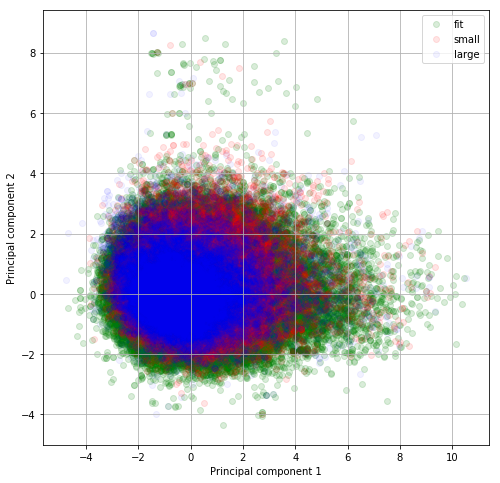

In [60]:
plt.figure(figsize = (8, 8))

plt.scatter(final_data[final_data['fit'] == 'fit']['principal_component_1'],
            final_data[final_data['fit'] == 'fit']['principal_component_2'],
            alpha = 0.15,
            label = 'fit',
            color = 'g')

plt.scatter(final_data[final_data['fit'] == 'small']['principal_component_1'],
            final_data[final_data['fit'] == 'small']['principal_component_2'],
            alpha = 0.1,
            label = 'small',
            color = 'r')

plt.scatter(final_data[final_data['fit'] == 'large']['principal_component_1'],
            final_data[final_data['fit'] == 'large']['principal_component_2'],
            alpha = 0.05,
            label = 'large',
            color = 'b')

plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.legend()
plt.grid()

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pca_X, y, test_size = 0.3, random_state = 42)

print(X_train.shape[0], X_test.shape[0])

134780 57764


> Возьмем вычисленное ранее best_n_neighbors и применим kNN

In [63]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 50).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.2604318148093189 0.26492278928052077


In [ ]:
err_pca_train = []
err_pca_test = []

In [83]:
%%time
for n in range(38, 39):
    pca = PCA(n_components=n)
    pca_X = pca.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(pca_X, y, test_size = 0.3, random_state = 42)
    
    knn = KNeighborsClassifier(n_neighbors = 50).fit(X_train, y_train)
    err_train = np.mean(y_train != knn.predict(X_train))
    err_test  = np.mean(y_test  != knn.predict(X_test))
    
    err_pca_train.append(err_train)
    err_pca_test.append(err_test)
    
    print(n, err_train, err_test)

38 0.2569520700400653 0.26272418807561804
CPU times: user 10min 50s, sys: 4.59 s, total: 10min 54s
Wall time: 10min 43s


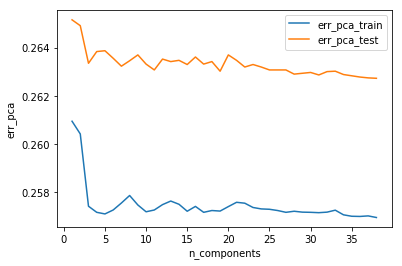

In [84]:
plt.plot(range(1, 39), err_pca_train, label='err_pca_train')
plt.plot(range(1, 39), err_pca_test, label='err_pca_test')
plt.xlabel('n_components')
plt.ylabel('err_pca')
plt.legend()

In [85]:
print(err_pca_test.index(min(err_pca_test)), min(err_pca_test))
print(len(err_pca_test))

37 0.26272418807561804
38


>  Наибольшая точность для best_n_neighbors = 50 достигается при 38 главных компонентах. Ошибка на тестовых данных на 0.0002 меньше, чем при использовании метода kNN на исходных данных

## Полносвязный классификатор

In [37]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes = (100,), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [38]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.2576346638967206 0.2621702098192646


In [39]:
err_mlp_train = []
err_mlp_test = []

In [43]:
for n in range(120, 160, 10):
    mlp_model = MLPClassifier(hidden_layer_sizes = (n,), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)
    
    err_train = np.mean(y_train != mlp_model.predict(X_train))
    err_test  = np.mean(y_test  != mlp_model.predict(X_test))
    
    err_mlp_train.append(err_train)
    err_mlp_test.append(err_test)
    
    print(n, err_train, err_test)

120 0.2579017658406292 0.2622740807423309
130 0.25804273631102537 0.2621702098192646
140 0.25810951179700253 0.26270687625510697
150 0.25788692684374537 0.26230870438335296


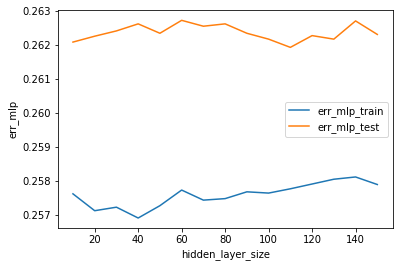

In [44]:
plt.plot(range(10, 160, 10), err_mlp_train, label='err_mlp_train')
plt.plot(range(10, 160, 10), err_mlp_test, label='err_mlp_test')
plt.xlabel('hidden_layer_size')
plt.ylabel('err_mlp')
plt.legend()

> При размере скрытого слоя, равном 110, ошибка на тестовых данных минимальна

In [49]:
alpha_arr = np.logspace(-3, 2, 21)
err_mlp_alpha_train = []
err_mlp_alpha_test = []

In [50]:
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (110,), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    err_train = np.mean(y_train != mlp_model.predict(X_train))
    err_test  = np.mean(y_test  != mlp_model.predict(X_test))
    
    err_mlp_alpha_train.append(err_train)
    err_mlp_alpha_test.append(err_test)
    
    print(alpha, err_train, err_test)

150 0.25779047336400057 0.2619797797936431
150 0.2579759608250482 0.2618759088705768
150 0.257760795370233 0.26223945710130875
150 0.25777563436711676 0.26222214528079774
150 0.257916604837513 0.2622913925628419
150 0.2577682148686749 0.26218752163977566
150 0.2578275708562101 0.2622740807423309
150 0.25784982935153583 0.26222214528079774
150 0.25796112182816444 0.2624818225884634
150 0.2579462828312806 0.26208365071670936
150 0.2578201513577682 0.2623606398448861
150 0.2579017658406292 0.26230870438335296
150 0.25786466834841965 0.262326016203864
150 0.25762724439827867 0.26222214528079774
150 0.2579462828312806 0.2620144034346652
150 0.2582133847751892 0.26220483346028667
150 0.258072414304793 0.2620490270756873
150 0.258228223772073 0.2621009625372204
150 0.25852500370974923 0.2627934353576622
150 0.25856210120195877 0.26281074717817327
150 0.25897017361626357 0.2634166608960598


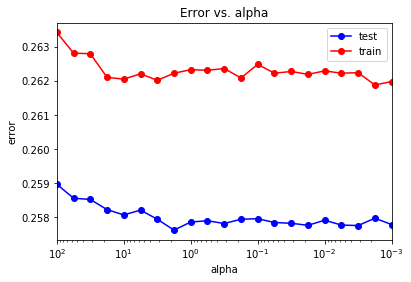

In [52]:
plt.semilogx(alpha_arr, err_mlp_alpha_train, 'b-o', label = 'test')
plt.semilogx(alpha_arr, err_mlp_alpha_test, 'r-o', label = 'train')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

> Минимальная ошибка:

In [53]:
min_train_err = np.min(err_mlp_alpha_train)
min_test_err = np.min(err_mlp_alpha_test)
print(min_train_err, min_test_err)

0.25762724439827867 0.2618759088705768


> Оптимальное значение alpha

In [56]:
alpha_opt = alpha_arr[err_mlp_alpha_test == min_test_err]
print(alpha_opt)
alpha_opt = alpha_opt[0]

[0.00177828]


## Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(n_estimators=1000, oob_score=True)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [40]:
y_train_pred = random_forest_model.predict(X_train)
y_test_pred = random_forest_model.predict(X_test)
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.0133699361923134 0.2770410636382522


In [41]:
err_rfc_train = []
err_rfc_test = []
err_rfc_oob = []

In [42]:
random_forest_model = RandomForestClassifier(oob_score=True)
for n in range(100, 1600, 100):
    random_forest_model.set_params(n_estimators=n)
    random_forest_model.fit(X_train, y_train)
    
    err_train = np.mean(y_train != random_forest_model.predict(X_train))
    err_test  = np.mean(y_test  != random_forest_model.predict(X_test))
    err_oob = 1 - random_forest_model.oob_score_
    
    err_rfc_train.append(err_train)
    err_rfc_test.append(err_test)
    err_rfc_oob.append(err_oob)
    
    print(n, err_train, err_test, err_oob)

100 0.013399614186081021 0.27885880479191194 0.2793292773408518
200 0.0133699361923134 0.2785471920227131 0.2771256863036059
300 0.0133699361923134 0.27747385915102835 0.27676955037839446
400 0.0133699361923134 0.27747385915102835 0.27625018548746105
500 0.0133699361923134 0.2779239664843155 0.2761017955186229
600 0.0133699361923134 0.2775777300740946 0.275864371568482
700 0.0133699361923134 0.27775084827920504 0.27639115595785724
800 0.0133699361923134 0.2774392355100062 0.2759830835435525
900 0.0133699361923134 0.27752579461256144 0.2758940495622496
1000 0.0133699361923134 0.2771968700228516 0.27595340554978487
1100 0.0133699361923134 0.27764697735613875 0.27561210862145724
1200 0.0133699361923134 0.2771795582023406 0.27561210862145724
1300 0.0133699361923134 0.27721418184336266 0.2758124350793887
1400 0.0133699361923134 0.2779239664843155 0.2757530790918534
1500 0.0133699361923134 0.27759504189460565 0.27535242617599054


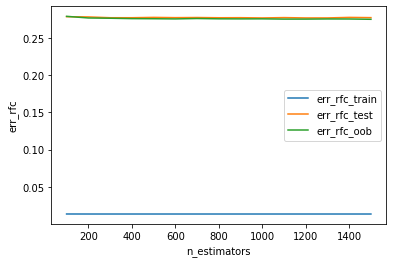

In [43]:
plt.plot(range(100, 1600, 100), err_rfc_train, label='err_rfc_train')
plt.plot(range(100, 1600, 100), err_rfc_test, label='err_rfc_test')
plt.plot(range(100, 1600, 100), err_rfc_oob, label='err_rfc_oob')
plt.xlabel('n_estimators')
plt.ylabel('err_rfc')
plt.legend()

> Минимальная ошибка:

In [45]:
min_train_err = np.min(err_rfc_train)
min_test_err = np.min(err_rfc_test)
print(min_train_err, min_test_err)

0.0133699361923134 0.2771795582023406


## Gradient Boosting Classifier

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_boosting_model = GradientBoostingClassifier(n_estimators=1000)
gradient_boosting_model.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [50]:
y_train_pred = gradient_boosting_model.predict(X_train)
y_test_pred = gradient_boosting_model.predict(X_test)
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.25020032645793144 0.2620317152551762


In [51]:
err_gbc_train = []
err_gbc_test = []

In [52]:
gradient_boosting_model = GradientBoostingClassifier()
for n in range(10, 160, 10):
    gradient_boosting_model.set_params(n_estimators=n)
    gradient_boosting_model.fit(X_train, y_train)
    
    err_train = np.mean(y_train != gradient_boosting_model.predict(X_train))
    err_test  = np.mean(y_test  != gradient_boosting_model.predict(X_test))
    
    err_gbc_train.append(err_train)
    err_gbc_test.append(err_test)
    
    print(n, err_train, err_test)

10 0.2609585991986942 0.26511321930614223
20 0.2589256566256121 0.2635205318191261
30 0.2579240243359549 0.26249913440897443
40 0.25745659593411485 0.26249913440897443
50 0.25730820596527676 0.2621528979987536
60 0.25714497699955485 0.26173741430648845
70 0.2571152990057872 0.2616681670244443
80 0.2570856210120196 0.2614431133578007
90 0.2569891675322748 0.2614777369988228
100 0.2569149725478558 0.261546984280867
110 0.25672948508680815 0.26156429610137805
120 0.2565588366226443 0.26173741430648845
130 0.25646980264134145 0.26170279066546637
140 0.25638076866003856 0.26168547884495535
150 0.25623237869120047 0.26168547884495535


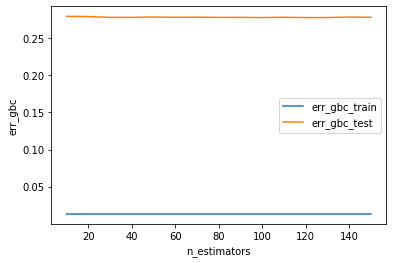

In [53]:
plt.plot(range(10, 160, 10), err_rfc_train, label='err_gbc_train')
plt.plot(range(10, 160, 10), err_rfc_test, label='err_gbc_test')
plt.xlabel('n_estimators')
plt.ylabel('err_gbc')
plt.legend()

> Минимальная ошибка:

In [54]:
min_train_err = np.min(err_gbc_train)
min_test_err = np.min(err_gbc_test)
print(min_train_err, min_test_err)

0.25623237869120047 0.2614431133578007
